# **Movimiento Browniano**

**Definición:**

Un proceso estocástico $\{B(t), t\geq 0\}$  se dice que es un movimoento Browniano si:

1.- $B(0) = 0$

2.- $\{B(t), t\geq 0\}$ tiene incrementos independientes y estacionarios.

3.- Para $t>0$, B(t) tiene distribución normal con media cero y varianza $t$. 

**Simulación:**

Sea 

$$0 = t_0 < t_1 < t_2 < , ..., < t_{n-1} < t_n = T$$ \\

Consideremos una partición sobre $[0, T]$ dada por $\Delta t = T/n$, tal que



$$0 = t_0 < t_1=\Delta t < t_2 = 2\Delta t < , ..., < t_{n-1} = (n-1)\Delta t< t_n = n \Delta t = T$$ \\

entonces para simular trajectorias del movimiento Browniano consideremos los incrementos


$$B(t_1) - B(t_0) = N(0, t_1 - t_0) = N(0, \Delta t - 0) = \sqrt{\Delta t} N(0, 1)$$
$$ B(t_2) - B(t_1) = N(0, t_2 - t_1) = N(0, 2\Delta t-\Delta t) = \sqrt{\Delta t} N(0, 1)$$
$$ \vdots $$
$$ B(t_n) - B(t_{n-1}) = N(0, t_n - t_{n-1}) = N(0, n\Delta t-(n-1)\Delta t) = \sqrt{\Delta t} N(0, 1)$$ \\

Sumando los incrementos se tiene que 

$$ B(t_n) - B(t_0) = \sum_{i=1}^{n} \sqrt{\Delta t} N(0, 1)$$

dado que $B(t_0) = 0$ entonces

$$ B(t_n) = \sqrt{\Delta t} \sum_{i=1}^{n} N(0, 1)$$

 y dado que $\sqrt{\Delta t} = T/n$, finalmente tenemos que 

$$ B(t_n)  = \sqrt{\frac{T}{n}} \sum_{i=1}^{n} N(0, 1)$$





In [75]:
library('dplyr')
library('tidyr')
library('ggplot2')

In [76]:
simMB <- function(t, nSteps, nReps){
  dt <- t/ nSteps
  # 
  simMat <- matrix(nrow=nReps, ncol=(nSteps+1))
  simMat[ ,1] <- 0
  for(i in 1:nReps){
    for(j in 2:(nSteps + 1)){
      simMat[i,j] <- simMat[i,j-1] + sqrt(dt)*rnorm(1,0,1)
    }
  }
  names <- c('Rep', sapply(0:nSteps, function(i) paste('S',i,sep='')))
  df <- data.frame('Rep'=1:nReps, simMat)
  colnames(df) <- names

  return(df)
}

 Ejemplo 1: Una trajectoria del Movimiento Browniano

In [83]:
# Ejemplo 1:
t <- 1
nSteps <- 1000
nReps <- 1

bm1 <- simMB(t, nSteps, nReps)
#print(gbm1)

In [84]:
df <- bm1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10))/nSteps,
         Rep = as.character(Rep))
head(df)

# Media y varianza teóricas
moments <- data.frame('t'=seq(from=0, to=1, length=nSteps+1)*t) %>%
  mutate('mean' = 0,
          'sd_inf' = mean - 2*sqrt(t),
          'sd_sup' = mean + 2*sqrt(t)) 

#print(moments)

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,0.00000000,0.000
1,S1,-0.01915996,0.001
1,S2,0.01829747,0.002
1,S3,0.06518213,0.003
1,S4,0.06504729,0.004
1,S5,0.07680803,0.005


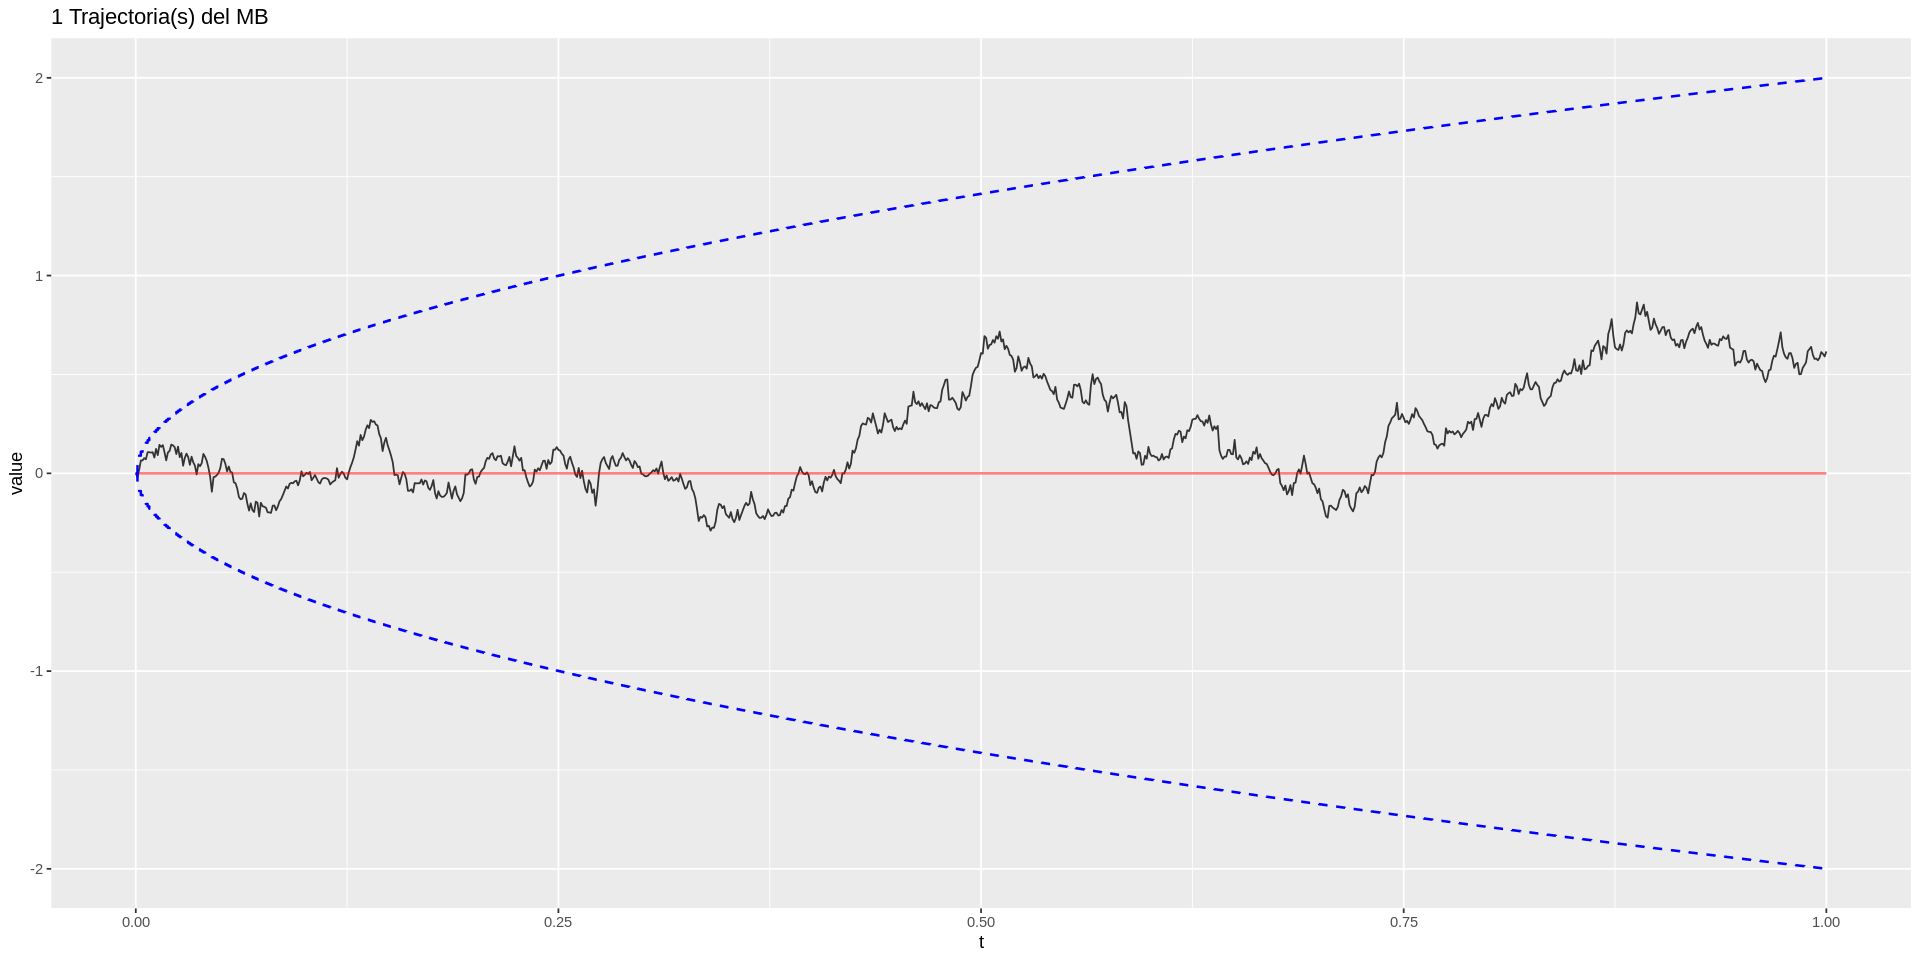

In [85]:
# Gráfico del Movimiento Browniano
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, mapping=aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  geom_step(moments, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  geom_step(moments, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_step(moments, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectoria(s) del MB")) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p1

**Ejemplo 2:** Mil trajectorias del movimiento Browniano

In [86]:
# Ejemplo 2: Mil trajectorias del movimiento Browniano
t <- 1
nSteps <- 1000
nReps <- 1000

bm1 <- simMB(t, nSteps, nReps)
#print(gbm1)

In [87]:
df <- bm1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10))/nSteps,
         Rep = as.character(Rep))
head(df)

# Media y varianza teóricas
moments <- data.frame('t'=seq(from=0, to=1, length=nSteps+1)*t) %>%
  mutate('mean' = 0,
          'sd_inf' = mean - 2*sqrt(t),
          'sd_sup' = mean + 2*sqrt(t)) 

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,0.000000000,0.000
1,S1,0.011480798,0.001
1,S2,0.002342038,0.002
1,S3,0.017433015,0.003
1,S4,-0.025482601,0.004
1,S5,-0.037709789,0.005


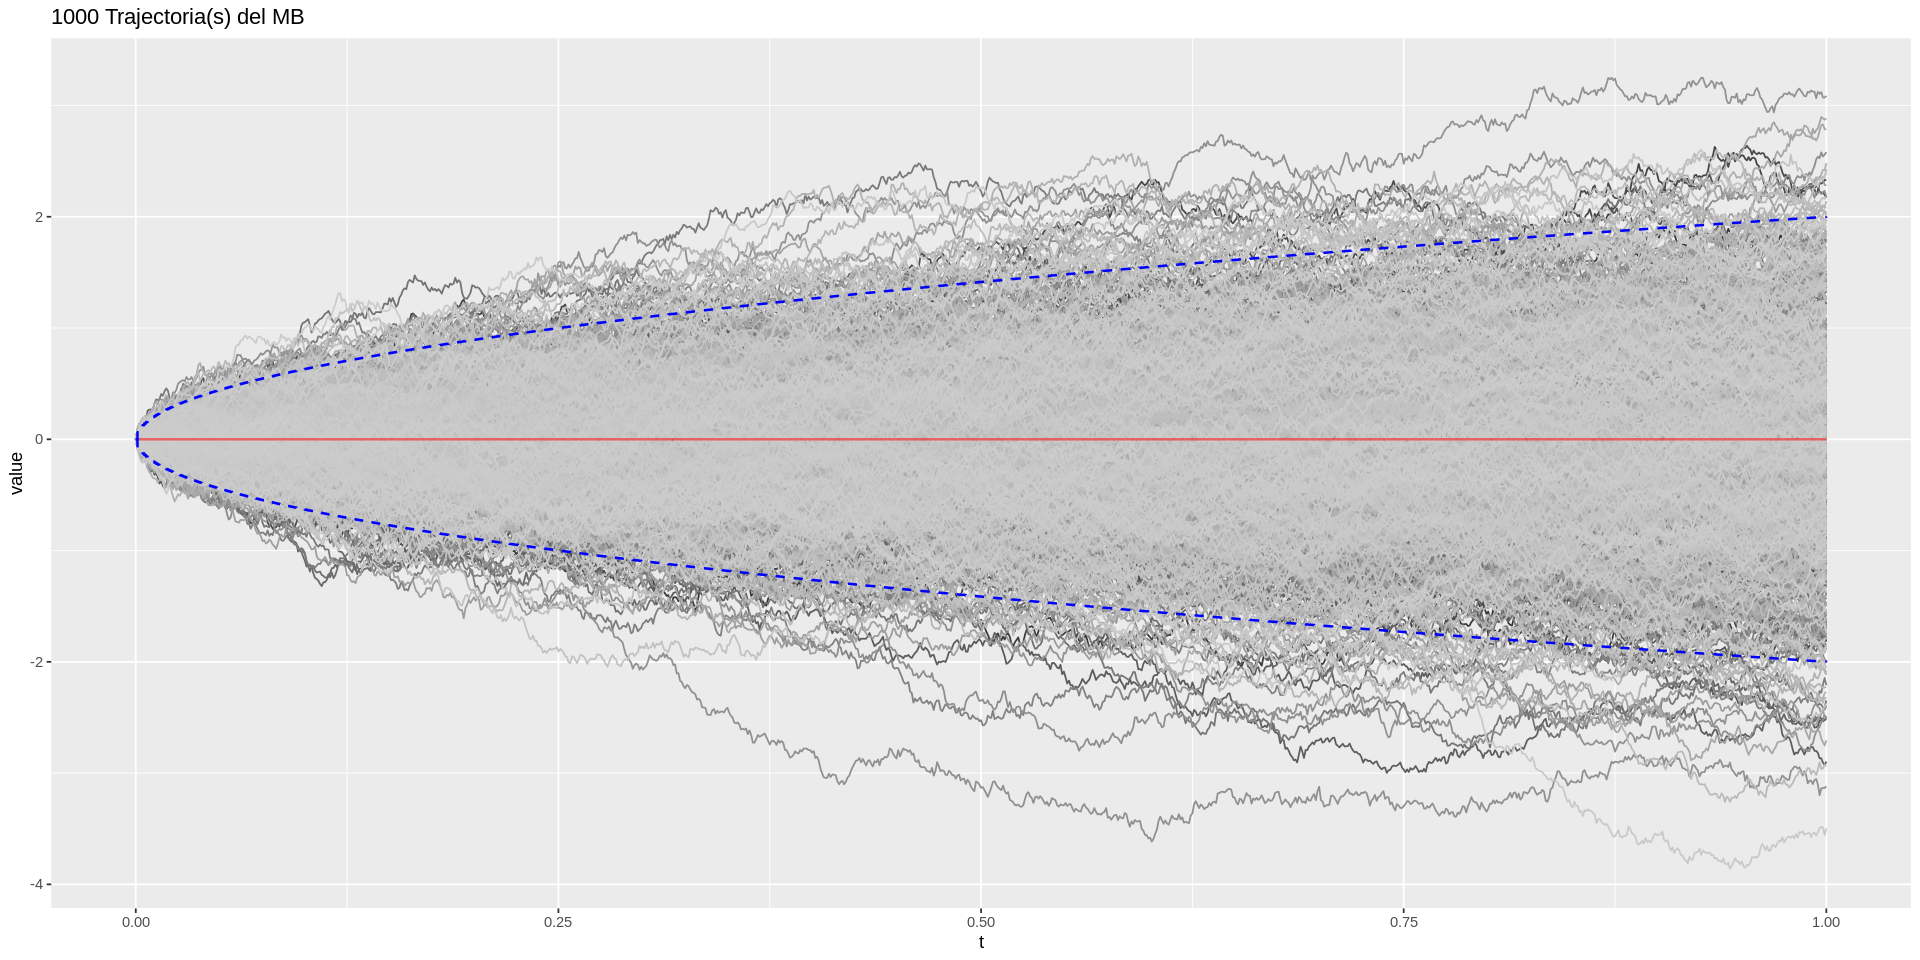

In [88]:
# Gráfico del Movimiento Browniano
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, mapping=aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  geom_step(moments, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  geom_step(moments, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_step(moments, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectoria(s) del MB")) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p1

# Movimiento Browniano en dos dimensiones

In [89]:
#  Movimiento Browniano en dos dimensiones
simBM2d <- function(base, n.steps){
  
  df <- base
  df_2d <- df  %>%
    gather(key='t',value='valor',-Rep) %>%
    filter(Rep == 1 | Rep== 2) %>%
    spread(Rep, valor)  %>%
    rename(Rep1 = '1', Rep2='2')%>%
    mutate(t = as.numeric(substring(t,2,10))) %>%
    arrange(t) %>%
    filter(t <= n.steps)
  b2 <- ggplot(df_2d,aes(x=Rep1,y=Rep2))+
    geom_point(color="blue") +
    geom_point(df_2d%>%filter(t == 1),mapping=aes(x=Rep1,y=Rep2),color="green") +
    geom_point(df_2d%>%filter(t == max(t)),mapping=aes(x=Rep1,y=Rep2),color="red") +
    geom_path() +
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank())
  return(b2)
}

**Ejemplo 1:**

In [90]:
# Ejemplo 1:
t <- 1
n.steps <- 10000   # number of steps
n.sim <- 1000     # number of trayectiries

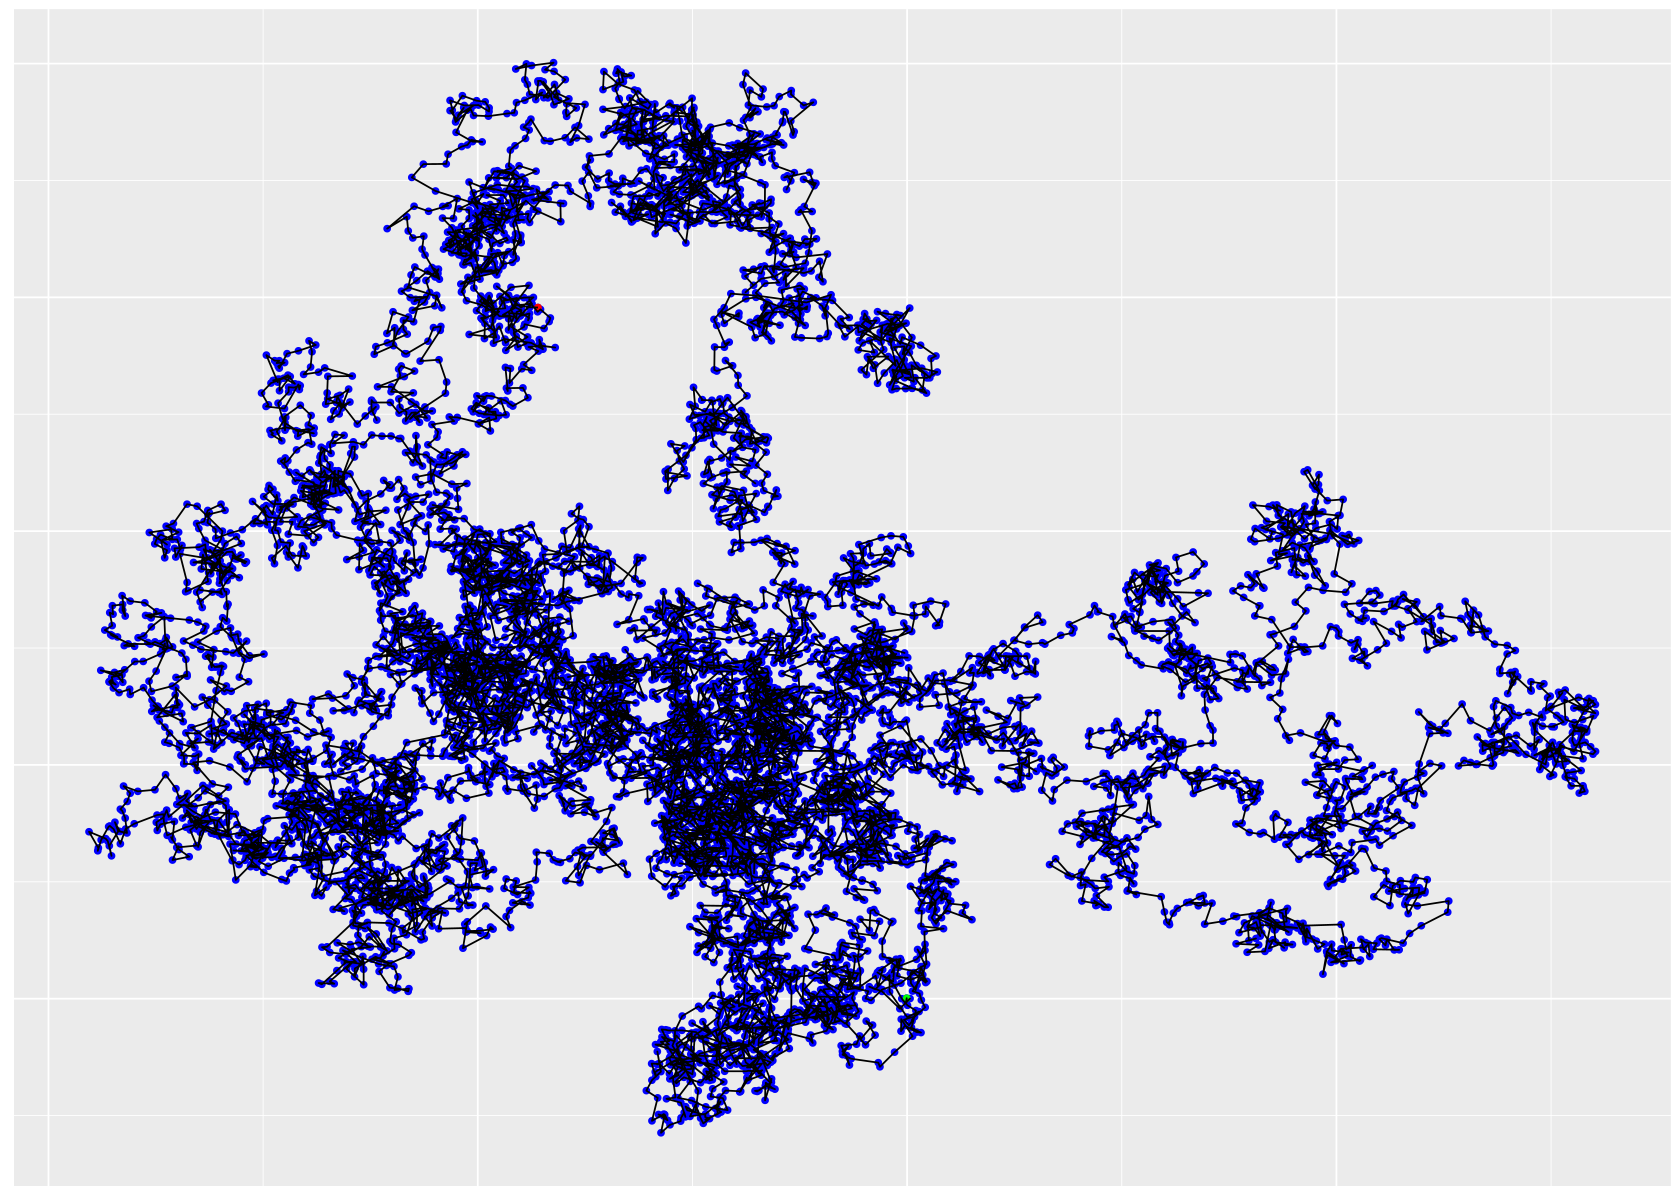

In [91]:
# Plot
options(repr.plot.width=14, repr.plot.height=10)
df <- simMB(t, n.steps, n.sim)
p3 <- simBM2d(df, n.steps)
p3 